In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

obitos_2019 = pd.read_csv("../dados/obitos-2019.csv")
obitos_2020 = pd.read_csv("../dados/obitos-2020.csv")

print(f"Formato 2019 {obitos_2019.shape} \nFormato 2020 {obitos_2020.shape}")

Formato 2019 (12339, 6) 
Formato 2020 (14666, 6)


In [7]:
obitos_2019.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
8010,RN,INDETERMINADA,HOSPITAL,70 - 79,F,1
2668,BA,SEPTICEMIA,DOMICILIO,30 - 39,M,5
2453,SE,SRAG,HOSPITAL,20 - 29,F,1
9530,SE,INDETERMINADA,HOSPITAL,80 - 89,M,2
8826,MG,OUTRAS,HOSPITAL,80 - 89,F,4205


In [6]:
obitos_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
4798,PR,OUTRAS,HOSPITAL,40 - 49,M,760
1981,DF,COVID,OUTRO,20 - 29,M,1
14471,RO,OUTRAS,DOMICILIO,N/I,I,2
2977,CE,SEPTICEMIA,IGNORADO,30 - 39,M,9
1916,BA,SRAG,HOSPITAL,20 - 29,F,3


In [8]:
obitos_2019["tipo_doenca"].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [15]:
obitos_2020.query("tipo_doenca == 'COVID'").groupby("uf").sum()
#obitos_2020.groupby("uf").sum()["total"].sum()

,total
uf,
AC,749
AL,2257
AM,2679
AP,728
BA,8007
CE,9485
DF,3822
ES,4884
GO,6927


In [18]:
obitos_2019.query("tipo_doenca == 'SRAG'").groupby("uf").sum().sum()

total    1497
dtype: int64

In [20]:
obitos_2020.query("tipo_doenca == 'SRAG'").groupby("uf").sum().sum()

total    15715
dtype: int64

In [30]:
proporcoes = dict()
for causa in obitos_2020["tipo_doenca"].unique():
    total_2019 = sum(obitos_2019.query(f"tipo_doenca == '{causa}'")["total"])
    total_2020 = sum(obitos_2020.query(f"tipo_doenca == '{causa}'")["total"])
    proporcoes[causa] = total_2020/total_2019
proporcoes


{'OUTRAS': 0.983177794202683,
 'COVID': 177299.0,
 'INDETERMINADA': 1.2989823706464096,
 'INSUFICIENCIA_RESPIRATORIA': 0.9296838413327886,
 'PNEUMONIA': 0.7610132207335804,
 'SEPTICEMIA': 0.8739549067982456,
 'SRAG': 10.497661990647963}

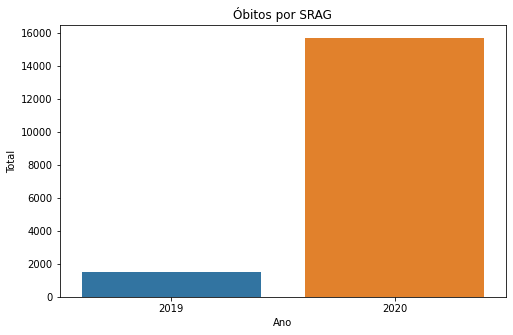

In [41]:
def grafico_comparativo(causa):

    total_2019 = sum(obitos_2019.query(f"tipo_doenca == '{causa}'")["total"])
    total_2020 = sum(obitos_2020.query(f"tipo_doenca == '{causa}'")["total"])
    dados = pd.DataFrame({'Total': [total_2019, total_2020],
                          'Ano': [2019, 2020]})
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Ano', y='Total', data= dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()


grafico_comparativo('SRAG')



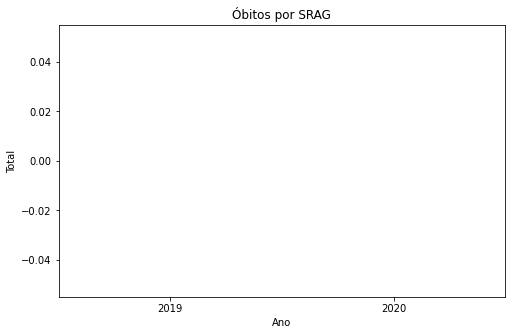

In [54]:
#Erro proposital
def grafico_comparativo(causa, estado = ""):
    
    if estado != "":
        logica = f"tipo_doenca == '{causa}'"
    else:
        logica = f"tipo_doenca == '{causa}' & uf == '{estado}'"
    
    total_2019 = sum(obitos_2019.query(logica)["total"])
    total_2020 = sum(obitos_2020.query(logica)["total"])
    dados = pd.DataFrame({'Total': [total_2019, total_2020],
                          'Ano': [2019, 2020]})
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Ano', y='Total', data= dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()


grafico_comparativo('SRAG')


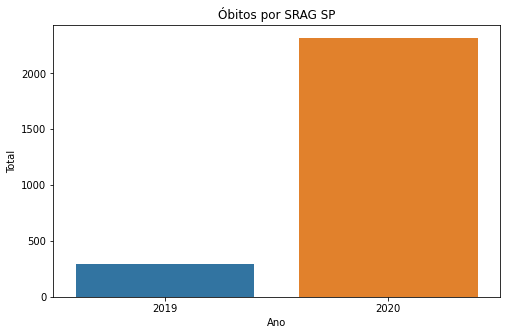

In [58]:
def grafico_comparativo(causa, estado = ""):
    
    if estado == "":
        logica = f"tipo_doenca == '{causa}'"

    else:
        logica = f"tipo_doenca == '{causa}' & uf == '{estado}'"

    
    total_2019 = sum(obitos_2019.query(logica)["total"])
    total_2020 = sum(obitos_2020.query(logica)["total"])
    dados = pd.DataFrame({'Total': [total_2019, total_2020],
                          'Ano': [2019, 2020]})
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Ano', y='Total', data= dados)
    plt.title(f"Óbitos por {causa} {estado}")
    plt.show()


grafico_comparativo('SRAG', "SP")
